# Implementation of Neural Network Classification on NSL-KDD Dataset
Using Method Described in *"Traffic Analysis Based Identification of Attacks"* found [here](http://cecs.louisville.edu/ry/Traffic.pdf).

Uses scikit-learn MLP learner to classify [NSL-KDD dataset](http://www.unb.ca/cic/research/datasets/nsl.html) and analyze results.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.neural_network import MLPClassifier

## Data Preprocessing
Define a data loading function, categorical variables are converted into numerical using categorical codes.

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

def load_data(file_path, cols=None):
    COL_NAMES = ["duration", "protocol_type", "service", "flag", "src_bytes",
                 "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                 "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                 "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                 "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                 "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                 "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                 "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                 "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                 "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]

    data = pd.read_csv(file_path)
    
 
    
    #Issues with values on columns 14 and 15
    #data.replace("NaN" ,0,inplace=True)
    #data.replace("Infinity", 0, inplace=True)
    
    data.dropna(inplace=True)
    
    """
    for col in data.columns:
        if (sum(data[col] =='NaN') > 0):
            print("Error : still NaN values in data \n")
        
        if(sum(data[col] =='Infinity') >0):
            print("Error : still Infinity values in data \n")
        
    """ 
    
  
    for col in data.columns: 
        if(col == " Label") : print("Ignorer colonne Label")
        
        else : data = data.loc[(data[col] < np.finfo(np.float64).max )] 
        
    # Shuffle data

    data = data.sample(frac=1).reset_index(drop=True)
      
    labels = data[' Label']        #VILAIN IDS2017 POUR L'ESPACE DEVANT DANS ' LABEL'. Bien profond hein.
    data.drop(' Label', axis=1, inplace=True)
    
    #data.iloc[:] = minmax_scale(data.iloc[:])
    
        
    return [data, labels]

## Slicing IDS 2017 to Training Set and Test Set

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

def load_slice_data(file_path, cols=None):
    
    data = pd.read_csv(file_path)
    
 
    
    #Issues with values on columns 14 and 15
    #data.replace("NaN" ,0,inplace=True)
    #data.replace("Infinity", 0, inplace=True)
    
    data.dropna(inplace=True)
    
    """
    for col in data.columns:
        if (sum(data[col] =='NaN') > 0):
            print("Error : still NaN values in data \n")
        
        if(sum(data[col] =='Infinity') >0):
            print("Error : still Infinity values in data \n")
        
    """ 
    
  
    for col in data.columns: 
        if(col == " Label") : print("Ignorer colonne Label")
        
        else : data = data.loc[(data[col] < np.finfo(np.float64).max )] 
    
      
    #labels = data[' Label']        #VILAIN IDS2017 POUR L'ESPACE DEVANT DANS ' LABEL'. Bien profond hein.
    #data.drop(' Label', axis=1, inplace=True)
    
    #data.iloc[:] = minmax_scale(data.iloc[:])
    
        
    return data

In [10]:
train_data = load_slice_data('data/concat.csv')


Ignorer colonne Label


In [11]:
print(train_data.shape)

(2827876, 79)


In [12]:

chunk = int (train_data.shape[0]*75/100)  #ratio = 75 %  /  25% 
train_set =train_data.iloc[:chunk,:]
test_set = train_data.iloc[chunk:,:]

print(train_set.shape)
print(test_set.shape)


test_set.head()

(2120907, 79)
(706969, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2123246,443,60837239,15,12,689,3207,385,0,45.933333,108.277729,...,32,290258.66670,250719.67190,802038,187753,9.849265e+06,3.957798e+05,10000000,9043083,BENIGN
2123247,443,65243011,14,14,840,3782,464,0,60.000000,134.637976,...,32,88647.66667,93776.01475,280067,50182,1.000000e+07,2.796633e+04,10000000,9959995,BENIGN
2123248,80,85707720,14,13,914,4116,424,0,65.285714,151.980985,...,20,144660.12500,298394.23130,883148,39002,1.000000e+07,6.201794e+02,10000000,9999353,BENIGN
2123249,443,113564843,35,51,946,76229,211,0,27.028571,55.200429,...,20,129731.00000,71202.82444,180079,79383,5.670000e+07,2.159423e+06,58200000,55100000,BENIGN
2123250,443,113841882,12,15,794,6240,197,0,66.166667,79.825757,...,20,141759.50000,96836.15236,210233,73286,5.680000e+07,2.462649e+06,58500000,55000000,BENIGN


## Exporting dataframes to csv files

In [14]:
train_set.to_csv("train_IDS2017.csv", index=False)
test_set.to_csv("test_IDS2017.csv", index=False)

## Neural Network Training and Testing
Define a function that trains the model and evaluates it on the test data, outputs accuracy on the training and test sets.

In [4]:
def train_clf(train_data, train_labels):
    bin_labels = train_labels.apply(lambda x: x if x =='BENIGN' else 'ANOMALY')
    clf = MLPClassifier(hidden_layer_sizes=(79,4), alpha=.7,
                        beta_1=.8, beta_2=.8)
    clf.fit(train_data, bin_labels)
    
    train_preds = clf.predict(train_data)
    
    TP = sum((train_preds == bin_labels) & (bin_labels == 'ANOMALY'))
    FP = sum((train_preds != bin_labels) & (bin_labels == 'BENIGN'))
    
    TN = sum((train_preds == bin_labels) & (bin_labels == 'BENIGN'))
    FN = sum((train_preds != bin_labels) & (bin_labels == 'ANOMALY'))
    
    train_acc = sum(train_preds == bin_labels)/len(train_preds)
    
    train_precision = TP/ (TP + FP) #Note: TP + FP = sum(train_preds == bin_labels)
    
    train_recall = TP/(TP + FN) #Note : TN + FN = sum(train_preds != bin_labels)
    
    train_f = 2 * train_precision * train_recall /(train_precision + train_recall)
    
    print("Accuracy on training set: {0:1%}".format(train_acc))
    print("Precision on training set: {0:1%}".format(train_precision))
    print("Recall on training set: {0:1%}".format(train_recall))
    print("F measure on training set: {0:1%}".format(train_f))

    return clf

In [5]:
def test_clf(test_data, test_labels, clf):
    bin_labels = test_labels.apply(lambda x: x if x =='BENIGN' else 'ANOMALY')
    test_preds = clf.predict(test_data)
    
    TP = sum((test_preds == bin_labels) & (bin_labels == 'ANOMALY'))
    FP = sum((test_preds != bin_labels) & (bin_labels == 'BENIGN'))
    
    TN = sum((test_preds == bin_labels) & (bin_labels == 'BENIGN'))
    FN = sum((test_preds != bin_labels) & (bin_labels == 'ANOMALY'))
    
    test_acc = sum(test_preds == bin_labels)/len(test_preds)
    
    test_precision = TP/ (TP + FP) #Note: TP + FP = sum(train_preds == bin_labels)
    
    test_recall = TP/(TP + FN) #Note : TN + FN = sum(train_preds != bin_labels)
    
    test_f = 2 * test_precision * test_recall /(test_precision + test_recall)
    print("Accuracy on test set: {0:1%}".format(test_acc))
    print("Precision on test set: {0:1%}".format(test_precision))
    print("Recall on test set: {0:1%}".format(test_recall))
    print("F measure on test set: {0:1%}".format(test_f))
    return test_preds

# Training Classifier

In [15]:
train_data, train_labels = load_data('train_IDS2017.csv')
train_data.head()

Ignorer colonne Label


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53,61111,2,2,86,242,43,43,43.000,0.000000,...,1,20,0.00000,0.00000,0,0,0.0,0.00000,0,0
1,46204,98494956,8,5,11595,363,5792,0,1449.375,1895.881019,...,5,32,12899.00000,0.00000,12899,12899,98500000.0,0.00000,98500000,98500000
2,80,115922437,16,14,432,1387,432,0,27.000,108.000000,...,1,32,48580.54545,38714.87785,165310,36826,10200000.0,60904.78647,10200000,10000000
3,53,255,2,2,96,180,48,48,48.000,0.000000,...,1,20,0.00000,0.00000,0,0,0.0,0.00000,0,0
4,53,199,2,2,80,336,40,40,40.000,0.000000,...,1,40,0.00000,0.00000,0,0,0.0,0.00000,0,0


In [16]:
print(train_data.shape)

(2120907, 78)


In [ ]:
clf = train_clf((train_data), train_labels)


# Testing

In [13]:
test_data, test_labels = load_data('test_IDS2017.csv')
test_data.head()

Ignorer colonne Label


,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2470609,9594,47,2,0,4,0,2,2,2.0,...,1,24,0.0,0.0,0,0,0.0,0.0,0,0
1,2526091,53,70094,2,2,76,438,38,38,38.0,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
2,2573560,53,23814,2,2,78,188,39,39,39.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,2386792,53,389271,1,1,53,53,53,53,53.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,2278461,53,50253,4,2,192,180,48,48,48.0,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0


In [42]:
test_preds = test_clf(test_data, test_labels, clf)

Accuracy on test set: 87.842466%
Precision on test set: 89.393895%
Recall on test set: 43.492423%
F measure on test set: 58.515537%


In [29]:
ATTACKS = {
    'BENIGN': 'BENIGN',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

test_cat_labels = test_labels.apply(lambda x: ATTACKS[x])
cats = {'U2R':[0, 0], 'DoS':[0, 0], 'R2L':[0, 0], 'Probe':[0, 0], 'BENIGN':[0, 0]}
for cat, pred in zip(test_cat_labels, test_preds):
    cats[cat][pred=='BENIGN'] += 1
print(cats)

for key, values in cats.items():
    print('\n' + key)
    total = sum(values)
    print('Total rows: {}'.format(total))
    if key == 'BENIGN':
        correct = values[1]
    else:
        correct = values[0]
    print('Percent correctly classified: {:.1%}'.format(correct/total))

KeyError: 'PortScan'

NameError: name 'cats' is not defined

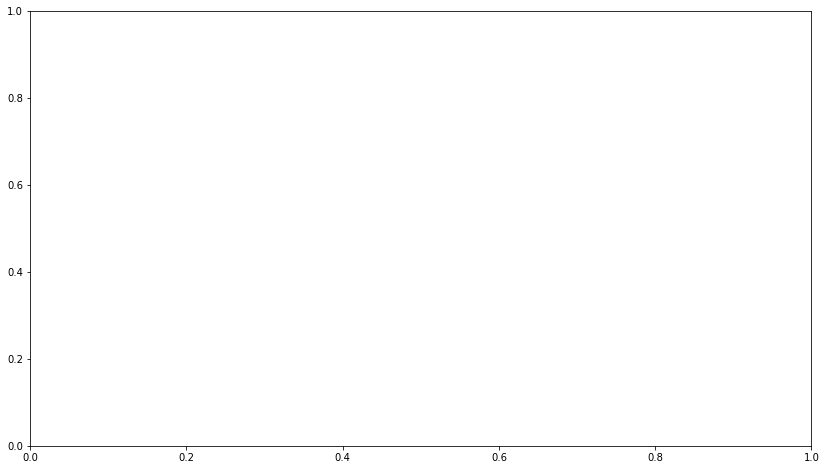

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(4)
width = .25
fig, ax = plt.subplots(figsize=(14,8))
del cats['normal']
anoms = [values[0] for key, values in cats.items()]
norms = [values[1] for key, values in cats.items()]
rect1 = ax.bar(ind, anoms, width, color='crimson')
rect2 = ax.bar(ind + width, norms, width, color='grey')
ax.set_ylabel('Number of Rows')
ax.set_title('Accuracy by Category')
ax.set_xlabel('Categories')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(cats.keys())
ax.legend((rect1[0], rect2[0]), ('Anomaly', 'Normal'))

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rect1, ax)
autolabel(rect2, ax)

__Probe__ and __DoS__ have the highest accuracy, while __U2R__ is about even. __R2L__ classification is abysmal, however __normal__ labeling is almost _100%_, which means this classifier has a lot more false negatives than false positives.